In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
oly_data=pd.read_csv("dataset_olympics.csv")
reg_data=pd.read_csv("noc_region.csv")

In [3]:
data = pd.merge(oly_data, reg_data, left_on = 'NOC', right_on = 'noc_region')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,noc_region,reg,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CHN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CHN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,CHN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CHN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CHN,China,NaN


In [4]:
# check data details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69945 entries, 0 to 69944
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          69945 non-null  int64  
 1   Name        69945 non-null  object 
 2   Sex         69945 non-null  object 
 3   Age         67215 non-null  float64
 4   Height      53706 non-null  float64
 5   Weight      52858 non-null  float64
 6   Team        69945 non-null  object 
 7   NOC         69945 non-null  object 
 8   Games       69945 non-null  object 
 9   Year        69945 non-null  int64  
 10  Season      69945 non-null  object 
 11  City        69945 non-null  object 
 12  Sport       69945 non-null  object 
 13  Event       69945 non-null  object 
 14  Medal       9687 non-null   object 
 15  noc_region  69945 non-null  object 
 16  reg         69937 non-null  object 
 17  notes       1244 non-null   object 
dtypes: float64(3), int64(2), object(13)
memory usage: 9.6+ MB


In [5]:
# data description 

data.describe()

,ID,Age,Height,Weight,Year
count,69945.000000,67215.000000,53706.000000,52858.000000,69945.000000
mean,18081.407921,25.644975,175.507820,70.903411,1977.759897
std,10235.928373,6.485093,10.385457,14.219613,30.108685
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9324.000000,21.000000,168.000000,61.000000,1960.000000
50%,18030.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


# Data Cleaning¶
Ensure data quality by handling missing values, removing duplicates, and correcting data types. Functions like fillna(), dropna(), and drop_duplicates() are crucial here. Proper data cleaning prevents inaccuracies in your analysis.

To clean the data, I will perform the following tasks:

  1.Remove Unnecessary Columns: The noc_region column will be       removed as it duplicates the information in the NOC column.
    Also notes is not necessary for my analysis
    
   2.Remove Missing Values: Rows with missing values in the          Height and Weight columns will be eliminated. This              ensures that the dataset only includes complete records        for these critical physical measurements.
   
   3.Replace Missing Values: Missing values in the Age column       will be replaced with the average age of the remaining         data. 
   
   This approach balances accuracy with the need to retain as      much data as possible, especially in cases where age data is    sporadically missing.


In [6]:
# Remove columns - noc_region, notes
data = data.drop(columns = ['noc_region', 'notes'])

In [7]:
# Remove missing value - Height, Weight
data = data.dropna(subset = ['Height', 'Weight'])

In [8]:
# Replace missing value - Age
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data.rename(columns={"reg":"Region"},inplace=True)

In [10]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 52483 entries, 0 to 69944
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      52483 non-null  int64  
 1   Name    52483 non-null  object 
 2   Sex     52483 non-null  object 
 3   Age     52483 non-null  float64
 4   Height  52483 non-null  float64
 5   Weight  52483 non-null  float64
 6   Team    52483 non-null  object 
 7   NOC     52483 non-null  object 
 8   Games   52483 non-null  object 
 9   Year    52483 non-null  int64  
 10  Season  52483 non-null  object 
 11  City    52483 non-null  object 
 12  Sport   52483 non-null  object 
 13  Event   52483 non-null  object 
 14  Medal   7103 non-null   object 
 15  Region  52476 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 6.8+ MB


In [12]:
# India details 
data.query('Team == "India"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
43880,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India
43881,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India
43882,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India
43883,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India
43884,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44164,31804,Karunagaran Ekambaram,M,26.0,164.0,52.0,India,IND,1980 Summer,1980,Summer,Moskva,Weightlifting,Weightlifting Men's Flyweight,NaN,India
44165,31835,Deep Grace Ekka,F,22.0,158.0,63.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Women's Hockey,NaN,India
44172,34901,Merwyn Fernandis,M,21.0,159.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
44173,34901,Merwyn Fernandis,M,25.0,159.0,62.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,NaN,India


In [13]:
# Japan details 
data.query('Team == "Japan"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
45398,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan
45402,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan
45403,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan
45404,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan
45405,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45919,33378,Yosuke Eto,M,29.0,162.0,60.0,Japan,JPN,1964 Winter,1964,Winter,Innsbruck,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Japan
45920,33585,Kimiko Ezaka,F,16.0,163.0,60.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 400 metres Freestyle,NaN,Japan
45921,33585,Kimiko Ezaka,F,16.0,163.0,60.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Japan
45922,33585,Kimiko Ezaka,F,20.0,163.0,60.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Women's 400 metres Individual Medley,NaN,Japan


In [14]:
# Top countries Participating 

top_10_countries=data.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

Team
United States    3851
France           3015
Italy            2960
Great Britain    2181
Canada           2117
Australia        1911
Germany          1508
Spain            1500
Brazil           1242
Sweden           1238
Name: count, dtype: int64

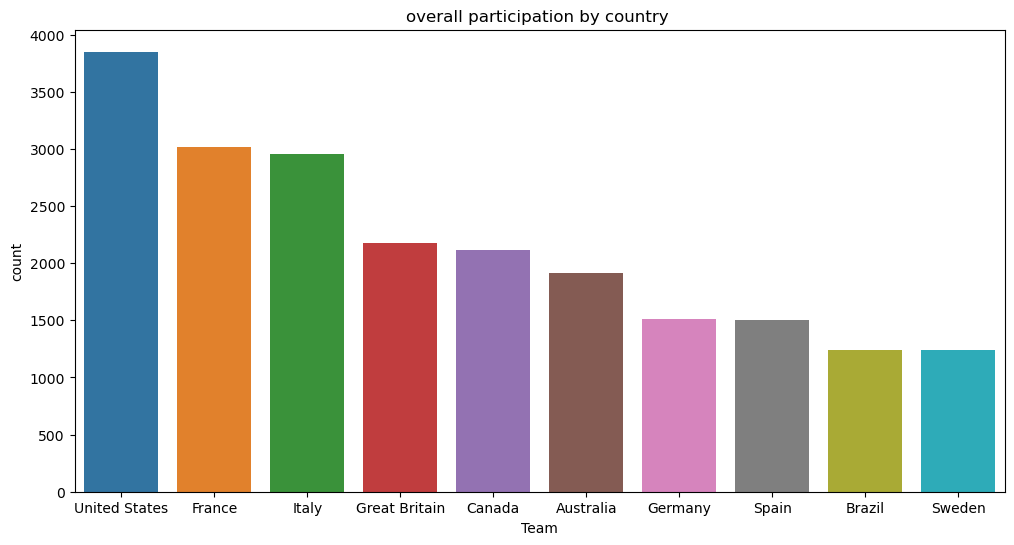

In [15]:
# plot for the top 10 countries 
plt.figure(figsize=(12,6))
plt.title("overall participation by country ")
sns.barplot(x=top_10_countries.index, y=top_10_countries);

(array([0.000e+00, 5.800e+01, 6.890e+02, 1.937e+03, 3.920e+03, 7.081e+03,
        8.786e+03, 8.779e+03, 6.949e+03, 5.221e+03, 3.319e+03, 2.156e+03,
        1.279e+03, 7.700e+02, 4.620e+02, 3.560e+02, 2.130e+02, 1.710e+02,
        9.800e+01, 7.600e+01, 6.200e+01, 4.700e+01, 2.300e+01, 1.400e+01,
        7.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34.,
        36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
        62., 64., 66., 68., 70., 72., 74., 76., 78.]),
 <BarContainer object of 34 artists>)

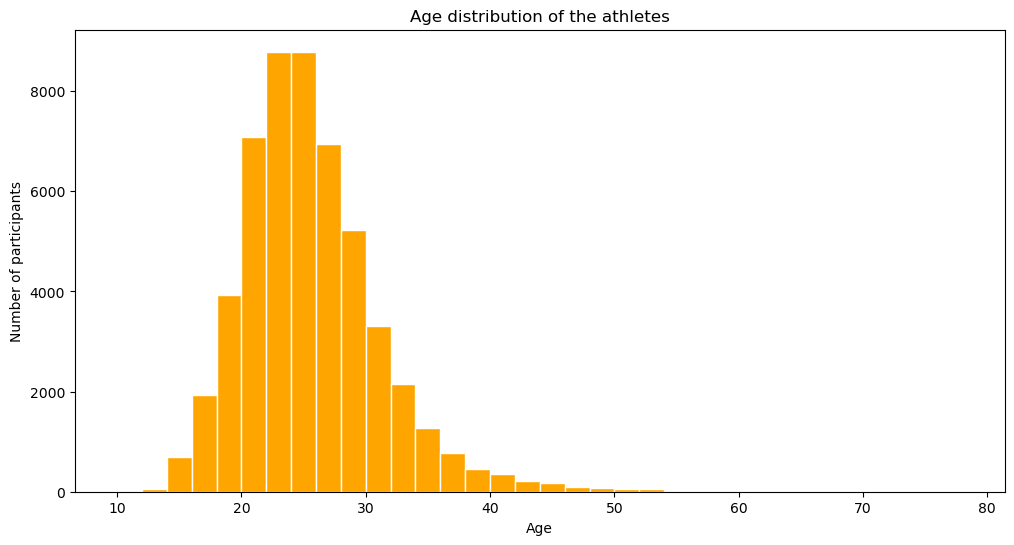

In [16]:
# Age Distribution of the participant 

plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(data.Age,bins=np.arange(10,80,2), color="orange",edgecolor="white")

In [17]:
# Winter olympics sport 
winter_sports= data[data.Season == "Winter"].Sport.unique()
print(winter_sports)

['Speed Skating' 'Short Track Speed Skating' 'Curling' 'Snowboarding'
 'Cross Country Skiing' 'Ice Hockey' 'Figure Skating' 'Freestyle Skiing'
 'Alpine Skiing' 'Bobsleigh' 'Nordic Combined' 'Biathlon' 'Ski Jumping'
 'Skeleton' 'Luge']


In [18]:
# Summer olympic sport 
winter_sports= data[data.Season == "Summer"].Sport.unique()
print(winter_sports)

['Basketball' 'Judo' 'Boxing' 'Wrestling' 'Swimming' 'Softball' 'Hockey'
 'Archery' 'Triathlon' 'Football' 'Rhythmic Gymnastics' 'Athletics'
 'Badminton' 'Fencing' 'Gymnastics' 'Volleyball' 'Baseball' 'Water Polo'
 'Shooting' 'Weightlifting' 'Cycling' 'Rowing' 'Sailing' 'Diving'
 'Modern Pentathlon' 'Synchronized Swimming' 'Handball' 'Canoeing'
 'Table Tennis' 'Tennis' 'Taekwondo' 'Beach Volleyball' 'Trampolining'
 'Golf' 'Equestrianism' 'Rugby Sevens' 'Ice Hockey' 'Art Competitions'
 'Tug-Of-War' 'Rugby' 'Lacrosse']


In [19]:
# Male and Femal participants 

gender_counts = data.Sex.value_counts()
gender_counts

Sex
M    36348
F    16135
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x19c8e4e2110>,
 [Text(0.08940677247582217, -1.0963605378868106, 'M'),
  Text(-0.08940677247582203, 1.0963605378868106, 'F')],
 [Text(0.04876733044135754, -0.5980148388473512, '69.3%'),
  Text(-0.04876733044135746, 0.5980148388473512, '30.7%')])

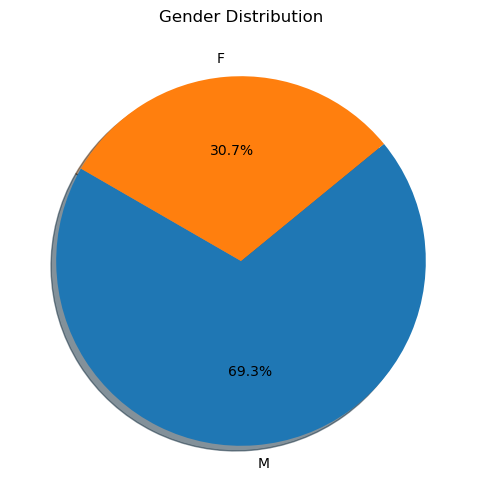

In [20]:
# Pie plot for male and female athletes 

plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts,labels=gender_counts.index,autopct="%1.1f%%",startangle=150,shadow=True)

In [21]:
# Total Medals 

data.Medal.value_counts()

Medal
Gold      2429
Bronze    2348
Silver    2326
Name: count, dtype: int64

In [22]:
# Total number of female athletes in each olympics 

female_participants = data[(data.Sex =='F') & (data.Season == "Summer")][["Sex","Year"]]
female_participants = female_participants.groupby("Year").count().reset_index()
female_participants.tail()

,Year,Sex
17,2000,1336
18,2004,1304
19,2008,1404
20,2012,1445
21,2016,1559


In [30]:
WomenOlympic = data[(data.Sex == "F") & (data.Season == "Summer")]
WomenOlympic

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China
17,6381,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69934,20954,Tshering Choden,F,25.0,165.0,52.0,Bhutan,BHU,2004 Summer,2004,Summer,Athina,Archery,Archery Women's Individual,NaN,Bhutan
69935,21405,Sonam Chuki,F,21.0,163.0,48.0,Bhutan,BHU,1984 Summer,1984,Summer,Los Angeles,Archery,Archery Women's Individual,NaN,Bhutan
69936,27416,Dorji Dema,F,24.0,168.0,57.0,Bhutan,BHU,2008 Summer,2008,Summer,Beijing,Archery,Archery Women's Individual,NaN,Bhutan
69940,23772,Mariana Cress,F,17.0,159.0,52.0,Marshall Islands,MHL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Marshall Islands


Text(0.5, 1.0, 'Women Participation')

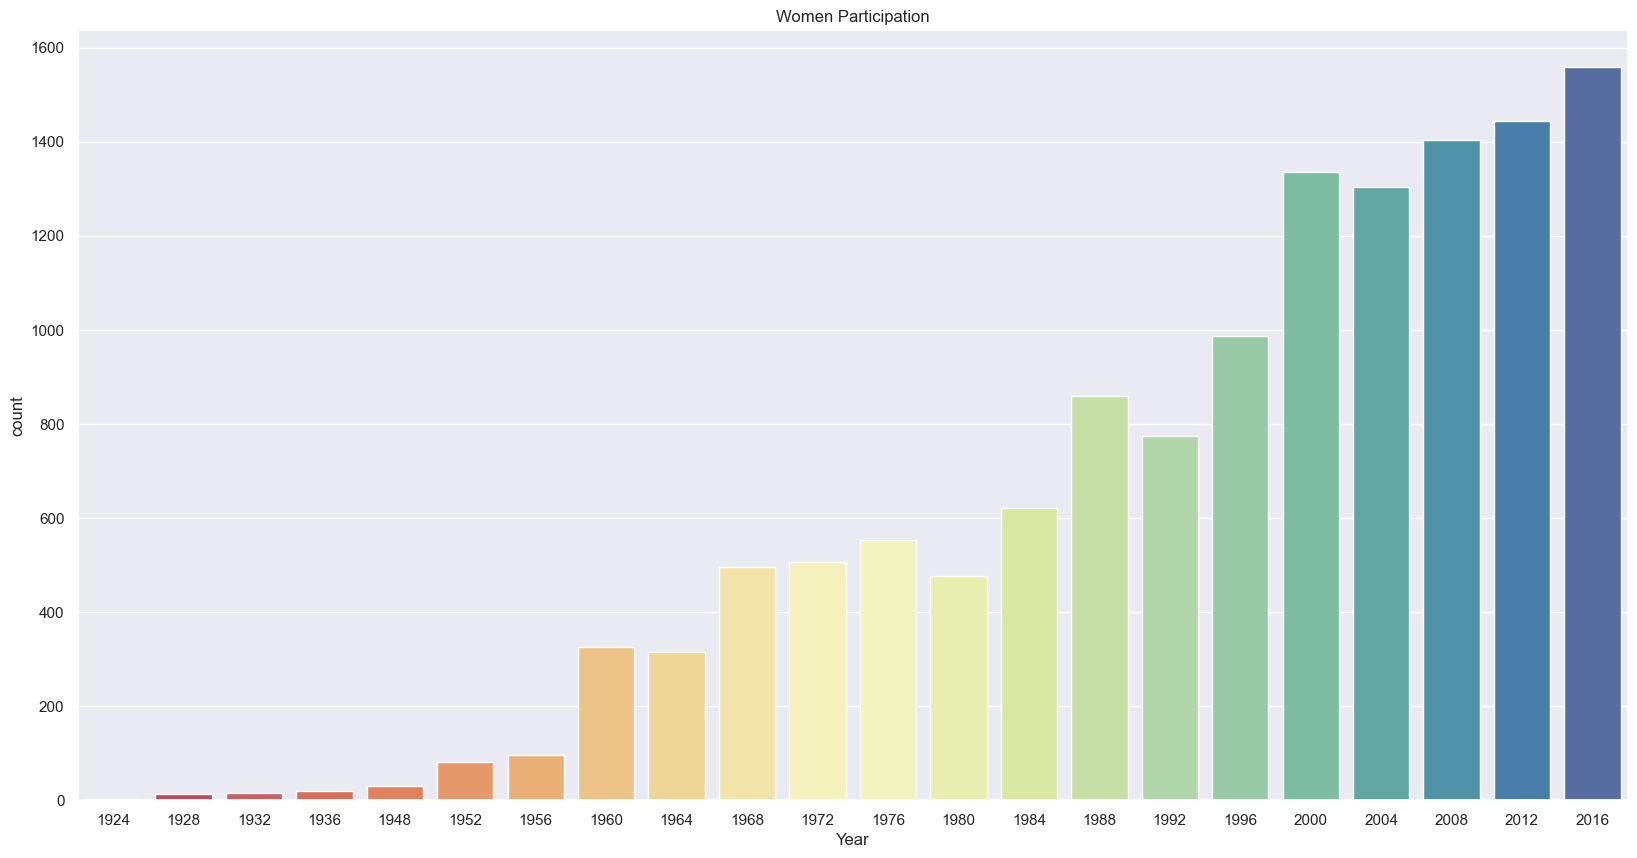

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(data=WomenOlympic,x="Year", palette="Spectral")
plt.title("Women Participation")

Text(0.5, 1.0, 'plot of Female Athletes over time ')

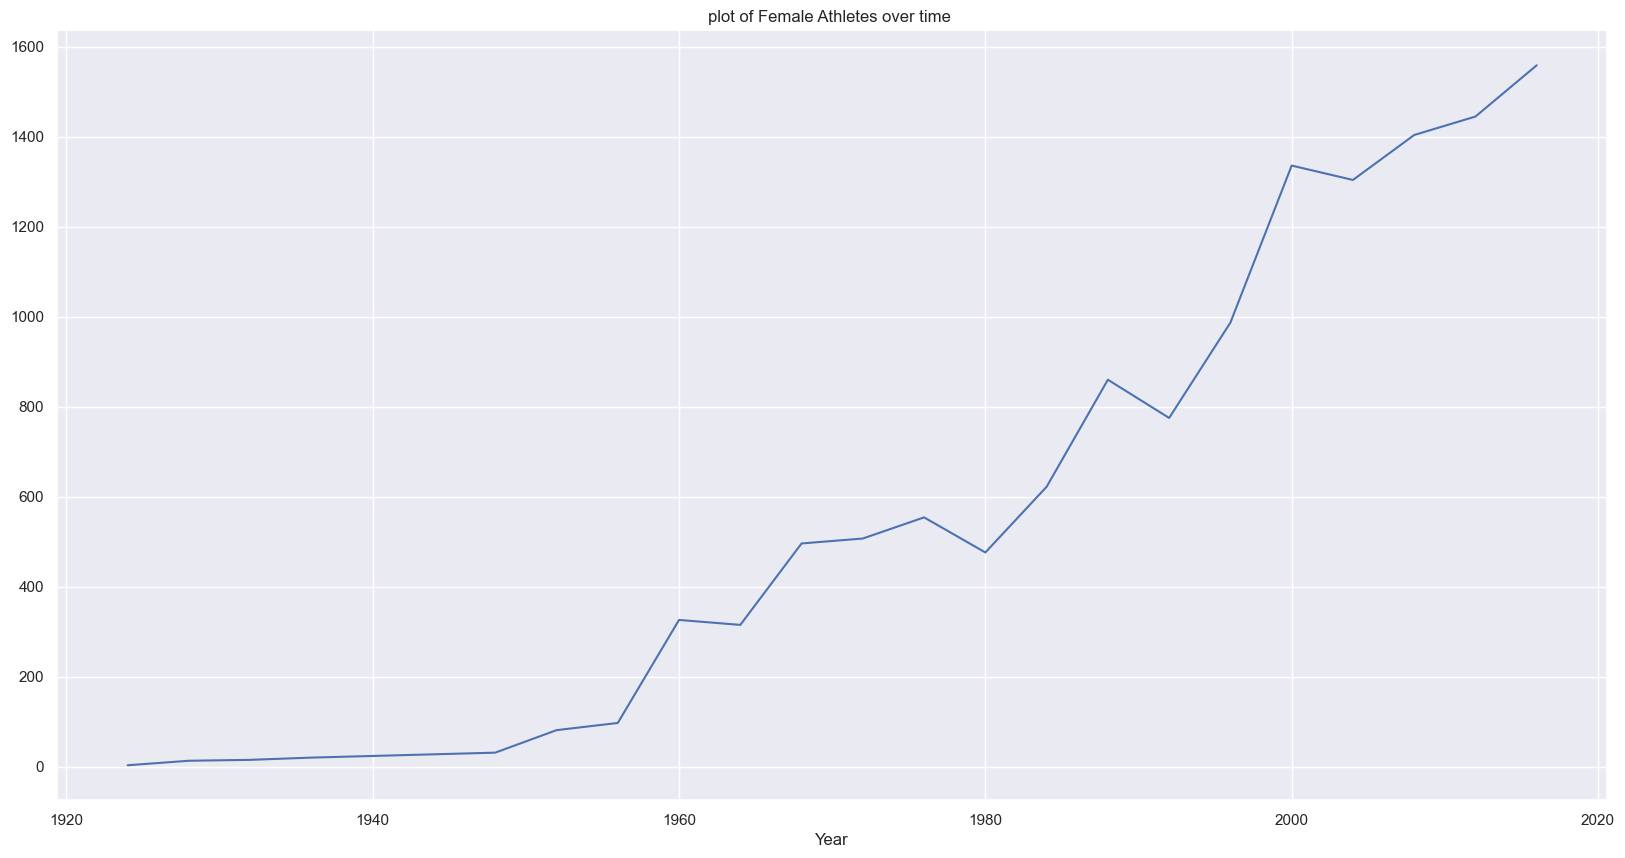

In [34]:
part=WomenOlympic.groupby("Year")["Sex"].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,"F"].plot()
plt.title("plot of Female Athletes over time ")

In [36]:
# Gold medal athletes 

goldMedals= data[(data.Medal == "Gold")]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
68,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China
77,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China
104,18005,Cao Yuan,M,17.0,160.0,42.0,China,CHN,2012 Summer,2012,Summer,London,Diving,Diving Men's Synchronized Platform,Gold,China
105,18005,Cao Yuan,M,21.0,160.0,42.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Springboard,Gold,China


In [39]:
# Gold medals from each country 

goldMedals.Region.value_counts().reset_index(name="Medal").head(5)

,Region,Medal
0,USA,608
1,Russia,284
2,Germany,214
3,Italy,132
4,UK,99


C:\Users\PRAKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gold Medals per Country')

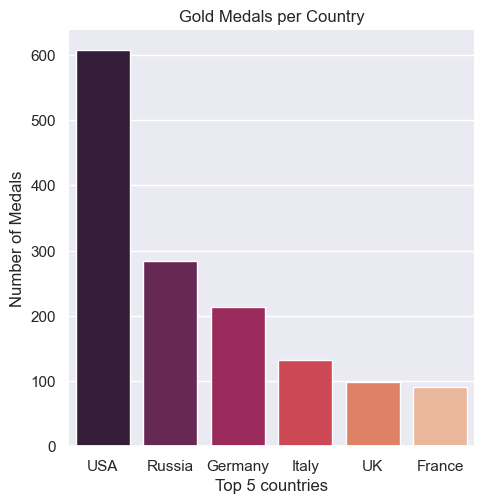

In [47]:
totalGoldMedals=goldMedals.Region.value_counts().reset_index(name="Medal").head(6)
g=sns.catplot(x="Region",y="Medal", data=totalGoldMedals,height=5,kind="bar",palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals per Country")